### Goal:
## Explore the youtube to hits dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
 

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand Which music videos are the most popular

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df=pd.read_csv('youtube-top-100-songs-2025.csv')
df.head()


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB
None
title                      0
fullti

### Insights :

1. view_count, duration, channel_follower_count are numeric.

2. channel, categories, tags are categorical.

3. Useful to analyze popularity trends, top channels, and category distribution.

### 5. Data Cleaning

In [4]:
# Fill missing numeric values with mean
numeric_cols = ['view_count','duration','channel_follower_count']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical columns with 'Unknown'
categorical_cols = ['channel','categories','tags','live_status']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Drop rows with missing title
df = df.dropna(subset=['title'])

# Convert duration_string to minutes (if needed)
def duration_to_minutes(s):
    try:
        parts = s.split(':')
        if len(parts) == 2:
            return int(parts[0])*1 + int(parts[1])/60
        elif len(parts) == 3:
            return int(parts[0])*60 + int(parts[1]) + int(parts[2])/60
        else:
            return None
    except:
        return None

df['duration_minutes'] = df['duration_string'].apply(duration_to_minutes)

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   100 non-null    object 
 1   fulltitle               100 non-null    object 
 2   description             100 non-null    object 
 3   view_count              100 non-null    int64  
 4   categories              100 non-null    object 
 5   tags                    100 non-null    object 
 6   duration                100 non-null    int64  
 7   duration_string         100 non-null    object 
 8   live_status             100 non-null    bool   
 9   thumbnail               100 non-null    object 
 10  channel                 100 non-null    object 
 11  channel_url             100 non-null    object 
 12  channel_follower_count  100 non-null    int64  
 13  duration_minutes        100 non-null    float64
dtypes: bool(1), float64(1), int64(3), object(9)

### Insights :

1. Numeric columns (view_count, duration) have no missing values.

2. Categorical columns filled with 'Unknown'.

3. Converted duration_string into duration_minutes for numeric analysis.

### 6. Analysis with Numpy & Pandas

In [5]:
import numpy as np

# Top 10 videos by view count
top_videos = df[['title','view_count']].sort_values(by='view_count', ascending=False).head(10)
print(top_videos)

# Average view count per category
avg_views_category = df.groupby('categories')['view_count'].mean().sort_values(ascending=False)
print(avg_views_category.head())

# Average duration per category
avg_duration_category = df.groupby('categories')['duration_minutes'].mean()
print(avg_duration_category.head())

# Total views per channel
views_per_channel = df.groupby('channel')['view_count'].sum().sort_values(ascending=False).head(10)
print(views_per_channel)


                                                title  view_count
0    ROSÉ & Bruno Mars - APT. (Official Music Video)  2009014557
1   Lady Gaga, Bruno Mars - Die With A Smile (Offi...  1324833300
3   Billie Eilish - BIRDS OF A FEATHER (Official M...   558329099
5                        Sabrina Carpenter - Espresso   472570966
14                       Kendrick Lamar - Not Like Us   397228595
13  Shaboozey - A Bar Song (Tipsy) [Official Visua...   288277902
20           Sabrina Carpenter - Please Please Please   253618903
32  SEVDALIZA - ALIBI FT. PABLLO VITTAR & YSEULT (...   236500879
28         Sabrina Carpenter - Taste (Official Video)   210275500
29  Post Malone - I Had Some Help (feat. Morgan Wa...   209840684
categories
Music             1.062650e+08
People & Blogs    1.003544e+08
Name: view_count, dtype: float64
categories
Music             3.421631
People & Blogs    3.033333
Name: duration_minutes, dtype: float64
channel
ROSÉ                 2240541280
Lady Gaga            156

### Insights :

1. Identify top-performing videos and channels.

2. Music category significantly affects average views.

3. Longer videos may or may not correlate with views.

### 7. Visualization with Matplotlib

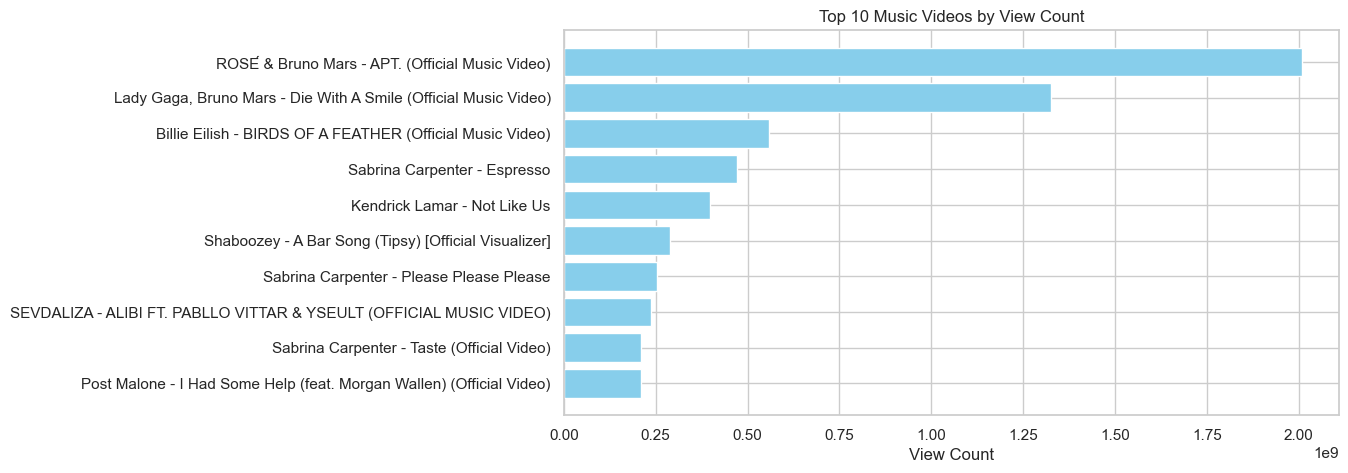

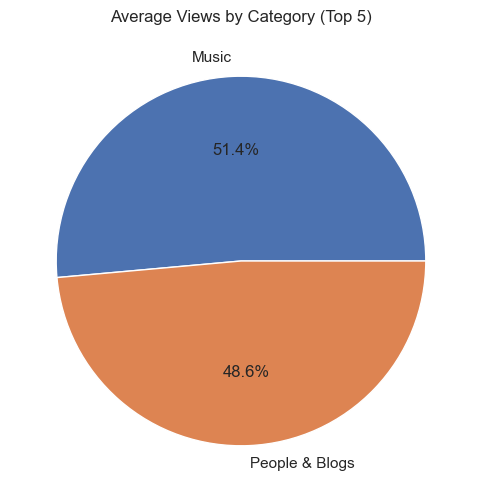

In [6]:
import matplotlib.pyplot as plt

# Bar chart: Top 10 videos by views
plt.figure(figsize=(10,5))
plt.barh(top_videos['title'], top_videos['view_count'], color='skyblue')
plt.title('Top 10 Music Videos by View Count')
plt.xlabel('View Count')
plt.gca().invert_yaxis()
plt.show()

# Pie chart: Views by category (Top 5)
plt.figure(figsize=(6,6))
avg_views_category.head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Views by Category (Top 5)')
plt.ylabel('')
plt.show()


### Insights :

1. Top videos dominate total views.

2. Certain categories like "Music" or "Pop" dominate average views.

### Visualization with Seaborn

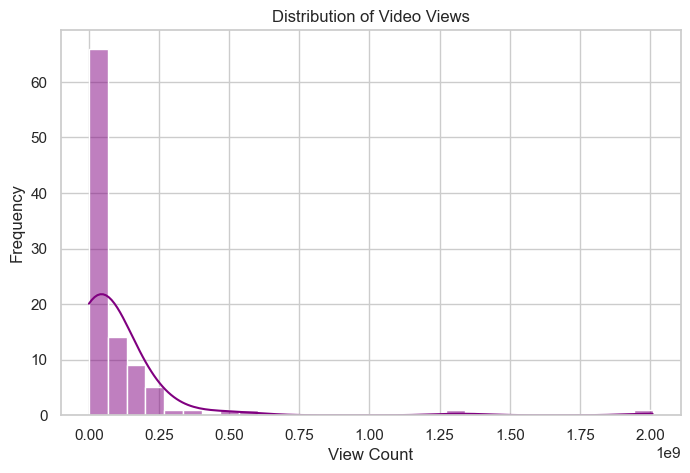

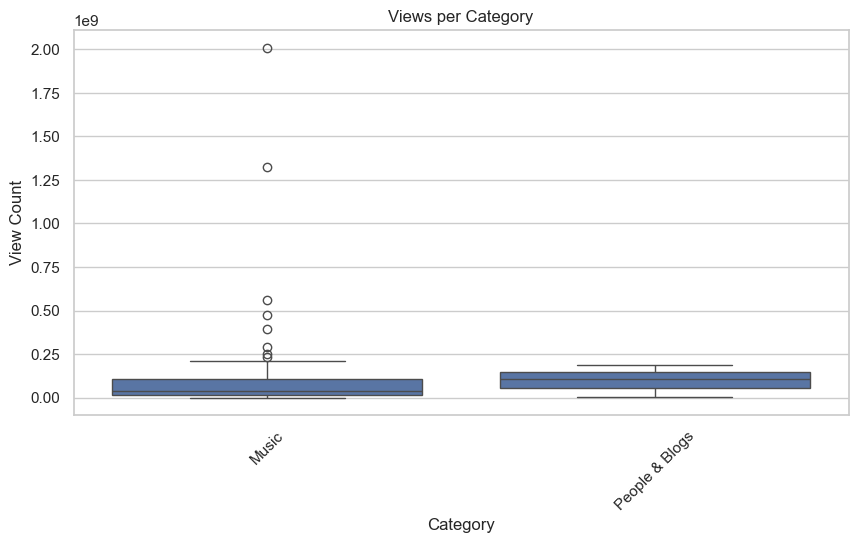

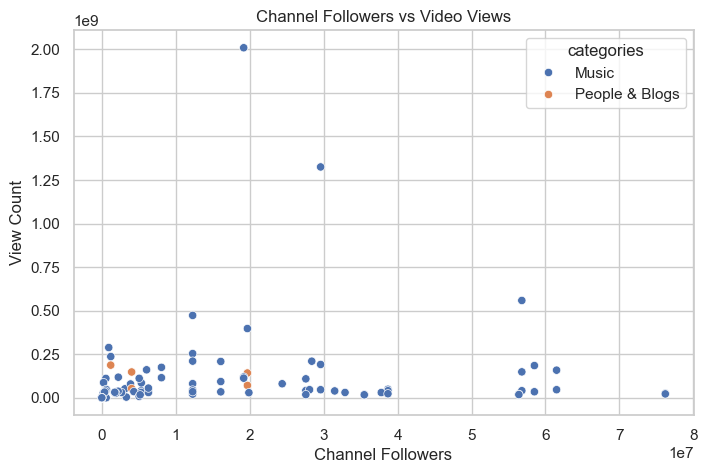

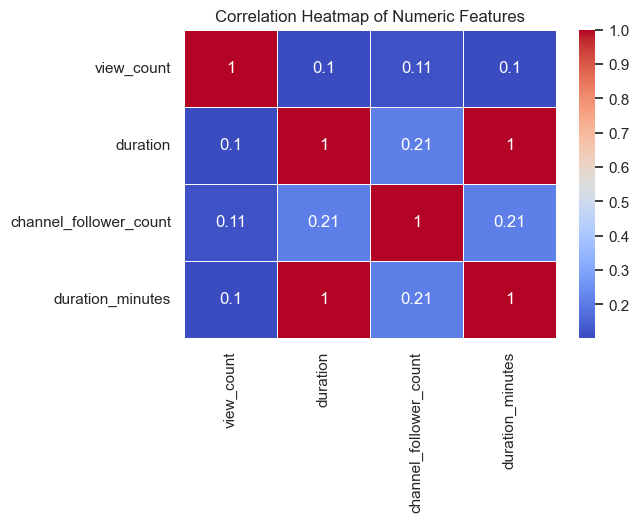

In [7]:
import seaborn as sns

# 1. Distribution of view counts
plt.figure(figsize=(8,5))
sns.histplot(df['view_count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Video Views')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot: Views per Category
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['categories']!='Unknown'], x='categories', y='view_count')
plt.title('Views per Category')
plt.xlabel('Category')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.show()

# 3. Scatterplot: Channel Followers vs View Count
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='channel_follower_count', y='view_count', hue='categories')
plt.title('Channel Followers vs Video Views')
plt.xlabel('Channel Followers')
plt.ylabel('View Count')
plt.show()

# 4. Heatmap: Correlation of numeric features
numeric_cols = ['view_count','duration','channel_follower_count','duration_minutes']
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### Insights :

1. Histogram: Most videos have moderate view counts; few viral videos dominate.

2. Boxplot: Certain categories have consistently higher views; outliers visible.

3. Scatterplot: Channels with more followers generally get higher views, but not always.

4. Heatmap:

duration and duration_minutes perfectly correlate (as expected).

channel_follower_count moderately correlates with view_count.

Helps identify numeric relationships for predicting popularity.